**классификатор изображений LeNet**

Евгений Борисов borisov.e@solarl.ru

## Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import utils 


In [3]:
np.random.seed(1671)

## Данные

In [4]:
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train = train_images/255.0
X_test = test_images/255.0

X_train = X_train[:,:,:,np.newaxis].astype('float32')
X_test = X_test[:,:,:,np.newaxis].astype('float32')

In [8]:
# X_train.shape, train_labels.shape, x_test.shape, test_labels.shape

In [9]:
NB_CLASSES = len(set(train_labels))
NB_CLASSES

10

In [10]:
# convert class vectors to binary class matrices
y_train = utils.to_categorical(train_labels, NB_CLASSES)
y_test = utils.to_categorical(test_labels, NB_CLASSES)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [12]:
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS,IMG_COLS,1)

## Модель

In [13]:
# initialize the optimizer and model
model = Sequential()
# CONV => RELU => POOL
model.add(Convolution2D(20, kernel_size=5, padding='same', input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(rate=0.7))
# CONV => RELU => POOL
model.add(Convolution2D(50, kernel_size=5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(rate=0.7))
# Flatten => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(rate=0.7))
# a softmax classifier
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
__________

In [15]:
model.compile(loss="categorical_crossentropy", optimizer='Adam',metrics=["accuracy"])
# model.compile(loss="categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])

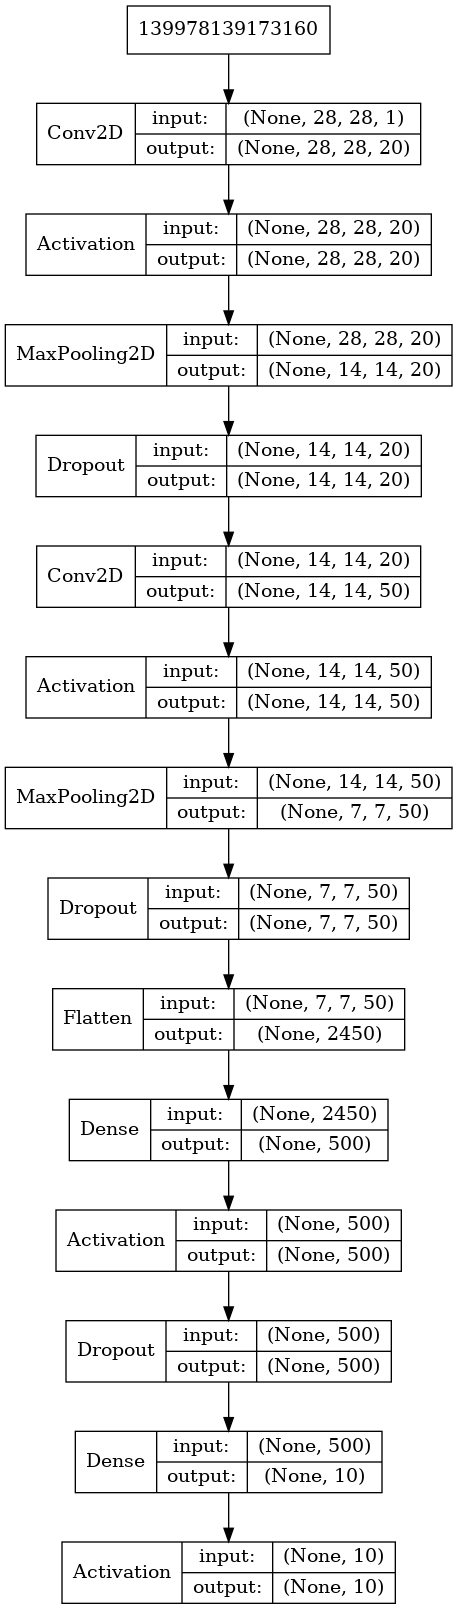

In [16]:
import IPython
from tensorflow.keras.utils import plot_model

plot_model(model,to_file='model-lenet.png', show_layer_names=False, show_shapes=True )
IPython.display.Image('model-lenet.png')

## Обучение

In [18]:
# network and training
NB_EPOCH = 400
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT=0.2

In [25]:
%%time

history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH, 
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/400
48000/48000 [==============================] - 3s 54us/sample - loss: 0.3418 - acc: 0.8735 - val_loss: 0.2704 - val_acc: 0.9008
Epoch 2/400
48000/48000 [==============================] - 3s 53us/sample - loss: 0.3410 - acc: 0.8736 - val_loss: 0.2711 - val_acc: 0.8989
Epoch 3/400
48000/48000 [==============================] - 3s 57us/sample - loss: 0.3435 - acc: 0.8737 - val_loss: 0.2722 - val_acc: 0.9003
Epoch 4/400
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3416 - acc: 0.8724 - val_loss: 0.2711 - val_acc: 0.9007
Epoch 5/400
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3415 - acc: 0.8736 - val_loss: 0.2822 - val_acc: 0.8947
Epoch 6/400
48000/48000 [==============================] - 3s 58us/sample - loss: 0.3417 - acc: 0.8747 - val_loss: 0.2894 - val_acc: 0.8904
Epoch 7/400
48000/48000 [==============================] - 3s 62us/sample - loss: 0.3417 - acc: 0.8742 - val_l

Epoch 59/400
48000/48000 [==============================] - 4s 74us/sample - loss: 0.3311 - acc: 0.8771 - val_loss: 0.2678 - val_acc: 0.8995
Epoch 60/400
48000/48000 [==============================] - 4s 74us/sample - loss: 0.3334 - acc: 0.8776 - val_loss: 0.2643 - val_acc: 0.9009
Epoch 61/400
48000/48000 [==============================] - 3s 73us/sample - loss: 0.3340 - acc: 0.8755 - val_loss: 0.2626 - val_acc: 0.9035
Epoch 62/400
48000/48000 [==============================] - 4s 74us/sample - loss: 0.3348 - acc: 0.8773 - val_loss: 0.2672 - val_acc: 0.9009
Epoch 63/400
48000/48000 [==============================] - 3s 73us/sample - loss: 0.3318 - acc: 0.8760 - val_loss: 0.2613 - val_acc: 0.9041
Epoch 64/400
48000/48000 [==============================] - 4s 73us/sample - loss: 0.3329 - acc: 0.8783 - val_loss: 0.2668 - val_acc: 0.9001
Epoch 65/400
48000/48000 [==============================] - 4s 74us/sample - loss: 0.3354 - acc: 0.8765 - val_loss: 0.2623 - val_acc: 0.9038
Epoch 66/400


Epoch 117/400
48000/48000 [==============================] - 4s 75us/sample - loss: 0.3255 - acc: 0.8792 - val_loss: 0.2598 - val_acc: 0.9027
Epoch 118/400
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3286 - acc: 0.8769 - val_loss: 0.2639 - val_acc: 0.9029
Epoch 119/400
48000/48000 [==============================] - 4s 73us/sample - loss: 0.3235 - acc: 0.8811 - val_loss: 0.2558 - val_acc: 0.9053
Epoch 120/400
48000/48000 [==============================] - 3s 72us/sample - loss: 0.3256 - acc: 0.8799 - val_loss: 0.2555 - val_acc: 0.9047
Epoch 121/400
48000/48000 [==============================] - 3s 73us/sample - loss: 0.3248 - acc: 0.8795 - val_loss: 0.2577 - val_acc: 0.9047
Epoch 122/400
48000/48000 [==============================] - 3s 73us/sample - loss: 0.3233 - acc: 0.8809 - val_loss: 0.2559 - val_acc: 0.9049
Epoch 123/400
48000/48000 [==============================] - 3s 72us/sample - loss: 0.3292 - acc: 0.8789 - val_loss: 0.2572 - val_acc: 0.9043
Epoch 

Epoch 175/400
48000/48000 [==============================] - 4s 73us/sample - loss: 0.3193 - acc: 0.8817 - val_loss: 0.2546 - val_acc: 0.9053
Epoch 176/400
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3159 - acc: 0.8811 - val_loss: 0.2607 - val_acc: 0.9028
Epoch 177/400
48000/48000 [==============================] - 3s 73us/sample - loss: 0.3180 - acc: 0.8834 - val_loss: 0.2500 - val_acc: 0.9076
Epoch 178/400
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3185 - acc: 0.8824 - val_loss: 0.2603 - val_acc: 0.9021
Epoch 179/400
48000/48000 [==============================] - 4s 80us/sample - loss: 0.3176 - acc: 0.8832 - val_loss: 0.2516 - val_acc: 0.9062
Epoch 180/400
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3179 - acc: 0.8832 - val_loss: 0.2524 - val_acc: 0.9063
Epoch 181/400
48000/48000 [==============================] - 4s 75us/sample - loss: 0.3191 - acc: 0.8808 - val_loss: 0.2567 - val_acc: 0.9028
Epoch 

Epoch 233/400
48000/48000 [==============================] - 4s 73us/sample - loss: 0.3134 - acc: 0.8843 - val_loss: 0.2460 - val_acc: 0.9078
Epoch 234/400
48000/48000 [==============================] - 4s 80us/sample - loss: 0.3108 - acc: 0.8852 - val_loss: 0.2515 - val_acc: 0.9069
Epoch 235/400
48000/48000 [==============================] - 4s 74us/sample - loss: 0.3145 - acc: 0.8836 - val_loss: 0.2483 - val_acc: 0.9079
Epoch 236/400
48000/48000 [==============================] - 4s 77us/sample - loss: 0.3139 - acc: 0.8836 - val_loss: 0.2492 - val_acc: 0.9065
Epoch 237/400
48000/48000 [==============================] - 4s 77us/sample - loss: 0.3141 - acc: 0.8849 - val_loss: 0.2470 - val_acc: 0.9063
Epoch 238/400
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3151 - acc: 0.8825 - val_loss: 0.2462 - val_acc: 0.9091
Epoch 239/400
48000/48000 [==============================] - 4s 73us/sample - loss: 0.3112 - acc: 0.8835 - val_loss: 0.2465 - val_acc: 0.9076
Epoch 

Epoch 291/400
48000/48000 [==============================] - 3s 73us/sample - loss: 0.3107 - acc: 0.8850 - val_loss: 0.2499 - val_acc: 0.9079
Epoch 292/400
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3099 - acc: 0.8852 - val_loss: 0.2435 - val_acc: 0.9086
Epoch 293/400
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3102 - acc: 0.8854 - val_loss: 0.2494 - val_acc: 0.9087
Epoch 294/400
48000/48000 [==============================] - 3s 69us/sample - loss: 0.3096 - acc: 0.8859 - val_loss: 0.2439 - val_acc: 0.9103
Epoch 295/400
48000/48000 [==============================] - 3s 68us/sample - loss: 0.3070 - acc: 0.8868 - val_loss: 0.2489 - val_acc: 0.9062
Epoch 296/400
48000/48000 [==============================] - 3s 69us/sample - loss: 0.3088 - acc: 0.8855 - val_loss: 0.2451 - val_acc: 0.9075
Epoch 297/400
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3106 - acc: 0.8860 - val_loss: 0.2414 - val_acc: 0.9082
Epoch 

Epoch 349/400
48000/48000 [==============================] - 3s 72us/sample - loss: 0.3022 - acc: 0.8891 - val_loss: 0.2489 - val_acc: 0.9061
Epoch 350/400
48000/48000 [==============================] - 4s 75us/sample - loss: 0.3061 - acc: 0.8856 - val_loss: 0.2412 - val_acc: 0.9103
Epoch 351/400
48000/48000 [==============================] - 4s 77us/sample - loss: 0.3016 - acc: 0.8876 - val_loss: 0.2408 - val_acc: 0.9105
Epoch 352/400
48000/48000 [==============================] - 4s 82us/sample - loss: 0.2987 - acc: 0.8870 - val_loss: 0.2408 - val_acc: 0.9104
Epoch 353/400
48000/48000 [==============================] - 4s 77us/sample - loss: 0.3055 - acc: 0.8860 - val_loss: 0.2397 - val_acc: 0.9102
Epoch 354/400
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3033 - acc: 0.8865 - val_loss: 0.2591 - val_acc: 0.9027
Epoch 355/400
48000/48000 [==============================] - 4s 74us/sample - loss: 0.3059 - acc: 0.8875 - val_loss: 0.2457 - val_acc: 0.9089
Epoch 

## Тестирование

In [26]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 79us/sample - loss: 0.2519 - acc: 0.9046

Test score: 0.25189602739810946
Test accuracy: 0.9046


---

In [27]:
# import matplotlib.pyplot as plt

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

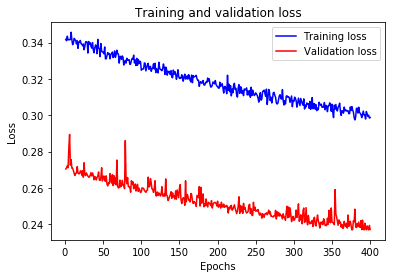

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

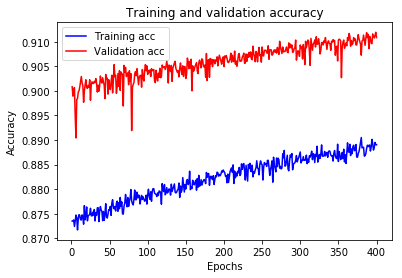

In [30]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

In [31]:
# class_names = [ 'T-shirt/top', 
#                 'Trouser', 
#                 'Pullover', 
#                 'Dress', 
#                 'Coat', 
#                 'Sandal', 
#                 'Shirt', 
#                 'Sneaker', 
#                 'Bag', 
#                 'Ankle boot' ]

In [32]:
class_names = [ 'футболка', 
                'брюки', 
                'свитер', 
                'платье', 
                'пальто', 
                'сандали', 
                'рубашка', 
                'тапки', 
                'сумка', 
                'полусапожки' ]

---

In [33]:
p = model.predict(X_test)
r = np.argmax(p,axis=1)
n = test_images.shape[1]

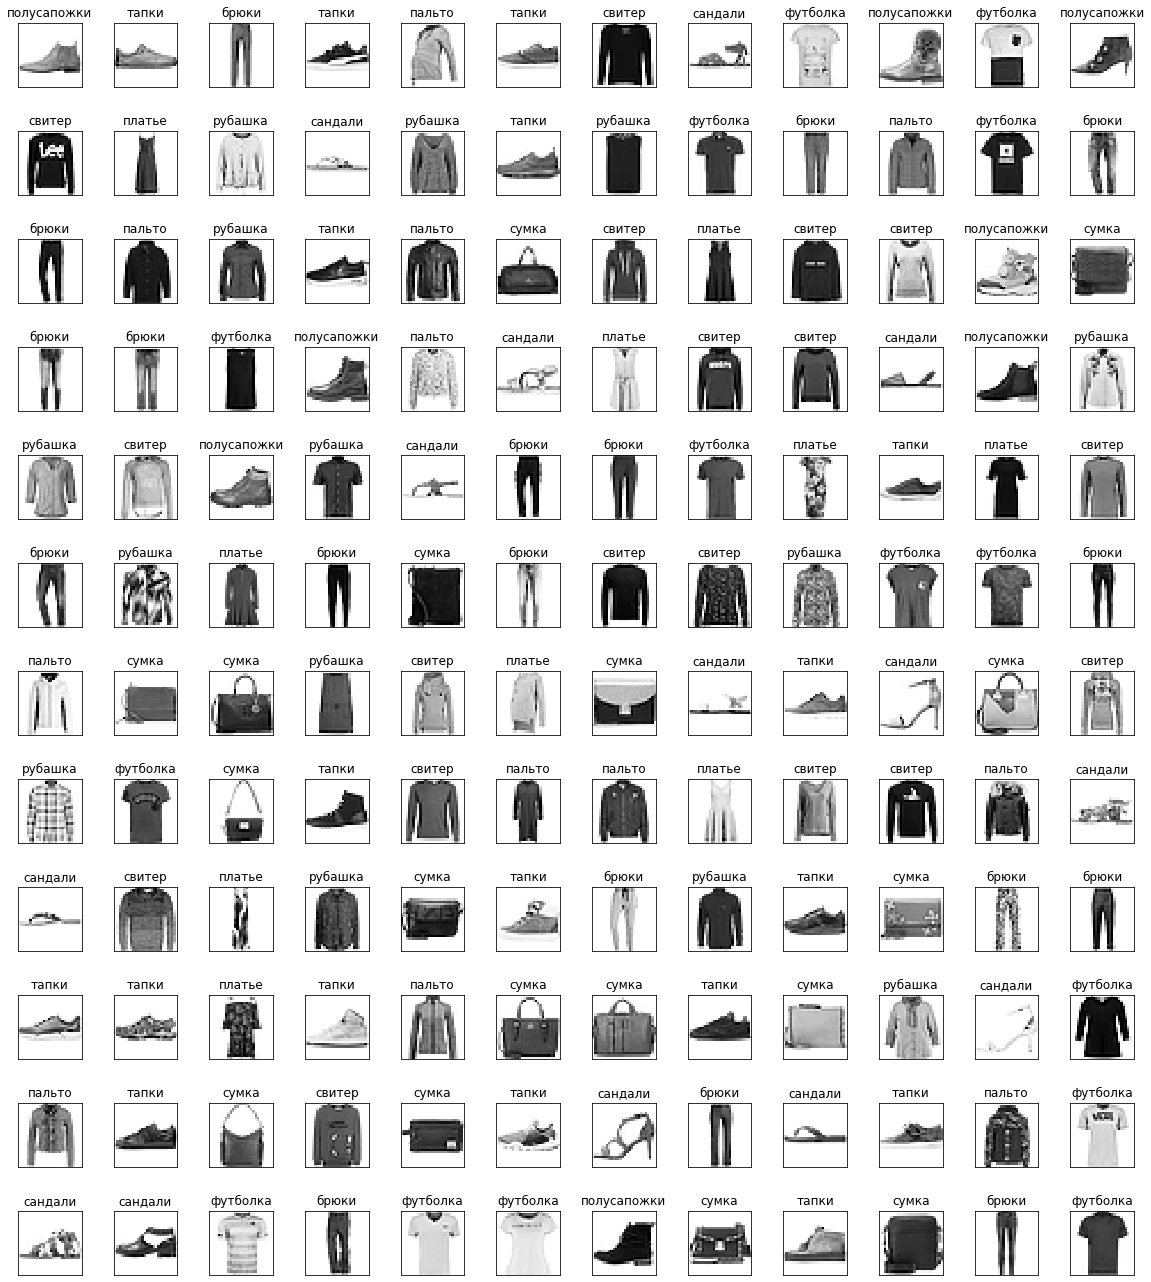

In [34]:
m=12

f, axarr = plt.subplots( m, m, figsize=(20,20))

k=0
for j in range(m):
    for i in range(m):
        k=m*j+i 
        axarr[i][j].set_title(class_names[r[k]])
        axarr[i][j].axes.get_xaxis().set_visible(False)
        axarr[i][j].axes.get_yaxis().set_visible(False)
        # axarr[i][j].imshow(test_images[k,:,:],cmap=plt.cm.plasma)
        axarr[i][j].imshow(test_images[k,:,:],cmap=plt.cm.Greys)
                        
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.subplots_adjust( top=1.0, hspace=0.5, wspace=0.5)
plt.show()

---

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

if tf.test.is_built_with_cuda():
    print('GPU devices:\n  ',
        [ [x.name, x.physical_device_desc] 
          for x in device_lib.list_local_devices() 
          if x.device_type == 'GPU' ]
    )
    print('default GPU device:', tf.test.gpu_device_name() )

else:
    print('no GPU device found')
    

tensorflow: 1.13.1
keras: 2.2.4-tf
GPU devices:
   [['/device:GPU:0', 'device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1']]
default GPU device: /device:GPU:0
